<div style="text-align:center">
<img src="img/nlopt.gif" width="600">
</div>





## Introduction
Comin' soon

** Creation in progress **

Hello, my main goal is to create non-linear optimizations involving demand and price.
These are essential optimizations to be made above all in the context of a business.
It's going to take time because I'm analyzing piles of docs to add them up, and arrive at the most simplified notebook possible.
Of course, then there are lots and lots of other things to do like optimizing objects, or using differential equations
in the optimizations, but I keep my level, I do it little by little, day after day.

## Summary
1. <b> Non-linear optimizations discovery</b>
    - 1.1 How to detect a non-linear problem
        - Quadratic
        - Non linear
    - 1.2 Local or global solution, convex problem or not ?
    - 1.3 Real life examples
    - 1.4 What solver to use, Scipy, Pyomo simple model, NlOpt, Gekko , Ipopt, Lingo ?
- Each N.L solvers simple codes discovery.
2. <b> Modeling of a non linear Quadratic Programming (QP)  production mixe optimization</b>
    - 2.1 Instance
    - 2.2 Ploting costs
    - 2.3 Mathematical modeling
    - 2.4 Gekko solution
    - 2.5 Cplex solution
3. <b> Modeling of a non linear Quadratic Programming (QP)  production mixe optimization</b>
    - 3.1 Instance : The great western appliance company
    - 3.2 Mathematical modeling
    - 3.3 Ploting profits
    - 3.4 Cplex solution
4. <b> Modeling of a non linear Quadratic Programming (QP)  production mixe optimization</b>
    - 3.1 Instance : Price and demand relations 
    - 3.2 Mathematical modeling
    - 3.3 Ploting profits
    - 3.4 Cplex solution
7. <b> Modeling of a non linear Markovitz Portfolio optimization</b>
    - Presentation of the problem in a table
    - Mathematical modeling
    - Gekko and Pyomo simple model solution
8. <b> Modeling of a non linear facility location model</b>
    - Instance
    - Mathematical modeling
    - Gekko and Pyomo simple model solution
9. <b> Modeling of a non linear Oilco NLP Haverly 1978</b>
    - Presentation of the Unknown book pb
    - Mathematical modeling
    - Gekko and Pyomo simple model solution
10. <b>Modeling of an optimal dimensions of a soda can </b>
    - Presentation of the problem in a table
    - Mathematical modeling
    - Gekko and Pyomo simple model solution
11. <b> Minimize the rosenbrock function using Scipy</b>
    - 4.1 Scipy code

12. <b> Modeling of a non linear location allocation model</b>
    - Presentation of the Beer Belge Ronald Rardin " Optimizations in O.R" 2nd edition
    - Mathematical modeling

# 1 <b> Non-linear optimizations discovery</b>

<b>1.1 Quadratic </b>

Quote by solver.com : "A quadratic programming (QP) problem has an objective which is a quadratic function of the decision variables, and constraints which are all linear functions of the variables."

Link : https://docs.mosek.com/modeling-cookbook/qcqo.html

<b>1.3 Real life examples</b><br>

<b>AMPL company Quotes :</b> <br>
"QuickDeliver, a fictional logistics company, faces a complex routing problem. Their challenge is to minimize the total travel time for their delivery vehicles, considering that travel time between two points is not strictly proportional to the distance (due to varying traffic conditions)".
<br><br>
"EcoManufacture, a fictional sustainable manufacturing firm, aims to optimize its production process. The challenge is the nonlinear relationship between the production rate and energy consumption due to varying efficiencies at different production levels."
<br><br>
"WealthGrow, a fictional investment firm, sought to optimize a portfolio for their clients. The challenge was the quadratic nature of the risk (variance) in portfolio optimization."
<br><br>

<b>Comillas university quote :</b><br><br>
- The transportation problem with volume discounts = The unitary price of transportation between two points decreases
depending on the volume that is transported.
<br>
• The optimal power flow problem of an electric power system
– Losses are nonlinear
<br>
• The product-mix problem with price and/or cost elasticity
– The demand curve or price-demand curve represents the unitary
price that is needed to sell units. This is a decreasing function, which
is never below the unitary production cost . The gross revenues (price
times quantity produced) is a nonlinear expression. Gross profit margin
– The nonlinear costs can appear due to an increased unitary efficiency
depending on the quantity

<br>
Selection of an investment portfolio

<br>
https://www.math.wpi.edu/saspdf/iml/chap11.pdf
https://www.studysmarter.co.uk/explanations/business-studies/accounting/nonlinear-optimization/
<br>

# <b>2.Modeling of a non linear Quadratic Programming (QP) production mixe optimization</b>

<div style="text-align:center">
<img src="img/3-AXES-2019-025-Copie.jpg" width="600">
</div>

<b>2.1 Instance</b>

I have one machine that produces 3 parts. The machine can produce a maximum of 1,000 products in the allotted time.
The selling price of parts A, B, and C decreases with the quantity produced.
- The selling price of part A is 81-qA/20 (The price decreases if a large quantity is produced)
- The selling price of part B is 90-qB/20 (The price decreases if a large quantity is produced)
- The selling price of part C is 85-qC/20 (The price decreases if a large quantity is produced)

Which parts should I sell to maximize profit while taking into account my non-linear price reduction?

<b>2.2 Ploting pricing</b>

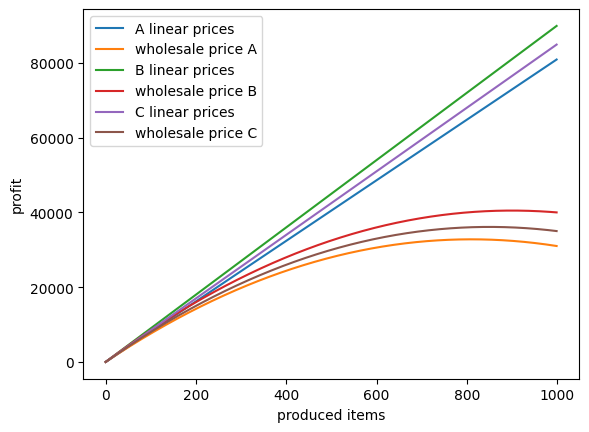

In [148]:
# -----------------------------------
# Import lib
# -----------------------------------
import matplotlib.pyplot as plt

# -----------------------------------
# Define range
# -----------------------------------
x_cords = range(0,1000)

# -----------------------------------
# functions
# -----------------------------------
linear_prices_A = [x * 81 for x in x_cords] 
non_linear_pricing_A = [x * ( 81 - x / 20) for x in x_cords] 

linear_prices_B = [x * 90 for x in x_cords] 
non_linear_pricing_B = [x * ( 90 - x / 20) for x in x_cords] 

linear_prices_C = [x * 85 for x in x_cords] 
non_linear_pricing_C = [x * ( 85 - x / 20) for x in x_cords] 

# -----------------------------------
# Plotting
# -----------------------------------
plt.plot(x_cords,linear_prices_A, label="A linear prices")
plt.plot(x_cords,non_linear_pricing_A, label="wholesale price A")

plt.plot(x_cords,linear_prices_B, label="B linear prices")
plt.plot(x_cords,non_linear_pricing_B, label="wholesale price B")

plt.plot(x_cords,linear_prices_C, label="C linear prices")
plt.plot(x_cords,non_linear_pricing_C, label="wholesale price C")

plt.xlabel("produced items")
plt.ylabel("profit")
plt.legend(loc="upper left")
plt.show()

<b>2.3 Math model</b><br>
$$
Max (P) = \sum_{j=1}^{3} x_{j}.(p_{j} - (\frac{x_{j}}{20})) 
$$
$$
subject \thinspace to 
$$
$$
 \sum_{j=1}^{3} x_{j} <= maxProd
$$
$$
x_{j} \in N
$$



$$
where
$$

$$
 x_{j} = amount \thinspace of \thinspace produced \thinspace items \thinspace j
$$
$$
 p_{j} = \thinspace produced \thinspace item \thinspace j \thinspace unit \thinspace price
$$
$$
 maxProd = max \thinspace total \thinspace produced \thinspace items
$$


<b>2.4 Gekko solution</b><br>

In [149]:
# -----------------------------------
# Import lib
# -----------------------------------
from gekko import GEKKO

# -----------------------------------
# Model
# -----------------------------------
m = GEKKO(remote=False) 

#The example problem that you referenced uses the default IPOPT solver. To get a binary or integer solution, switch to the APOPT solver.
m.options.SOLVER = 1

# -----------------------------------
# Decision variables
# -----------------------------------
A = m.Var(value=1,lb=0,ub=10000,integer=True)
B = m.Var(value=1,lb=0,ub=10000,integer=True)
C = m.Var(value=1,lb=0,ub=10000,integer=True)

# -----------------------------------
# Math model
# -----------------------------------
# Objective
m.Maximize( A * (81 - ( A / 20  )) + B * (90 - (B / 20)) + C * (85 - (C / 20)))

# Constraint
m.Equation( A + B + C <= 1000) 

# -----------------------------------
# Solution
# -----------------------------------
 
m.options.IMODE = 3 # Steady state optimization

m.solve(disp=False) # Solve

print('Solution')

print('A: ' + str(A.value))
print('B: ' + str(B.value))
print('C: ' + str(C.value))

print('Objective: ' + str(-m.options.objfcnval))

Solution
A: [290.0]
B: [380.0]
C: [330.0]
Objective: 68870.0


<b>2.5 Cplex solution</b><br>

<div style="text-align:center">
<img src="img/IBM_CPLEX_0.png">
</div>


Warning, in reality, I am using DocPlex here, who automatically picks quadratic.
This is an object orientated surcouche to Cplex.

In [150]:
# -----------------------------------
# Import lib
# -----------------------------------
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# -----------------------------------
# Type of problem
# -----------------------------------
model = Model(name='maximize_profit', log_output=True)

# -----------------------------------
# Decisions variables
# -----------------------------------
A = model.integer_var(name='A')
B = model.integer_var(name='B')
C = model.integer_var(name='C')

# -----------------------------------
# Math model
# -----------------------------------
# Objective
model.maximize(A * (81 - ( A / 20  )) + B * (90 - (B / 20)) + C * (85 - (C / 20))) 

# Constraints
model.add_constraint(A + B + C <= 1000)

# -----------------------------------
# Solution
# -----------------------------------
model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 68870.000
status: OPTIMAL_SOLUTION(2)
  A=290
  B=380
  C=330


# <b> 3.  Modeling of a non linear Quadratic Programming (QP)  production mixe optimization</b>

## 3.1 Instance : The great western appliance company

Sells 2 models of toasters oven, the microtoaster(X1) and the self clean toaster oven (X2).
They earn a profit of 28 dollars for each microtoaster, no matter the number of units sold.
For the self clean oven, profit increases as more units are sold due to a fixed overhead.

Link : https://www.youtube.com/watch?v=pwUgB5-PzcY

The profit function for the self clean oven:

21X2 + 0.25X2²

## 3.2 Math model 



$$
Max (P) = 28X1 + 21X2 + 0.25X2² 
$$
$$
subject \thinspace to 
$$
$$
 X1 + X2 <= 1000 \thinspace (Production \thinspace capacity)
$$
$$
 0.5X1 + 0.4X2 <= 500 \thinspace (Sales \thinspace time)
$$
$$
X_{j} \in N
$$



$$
where
$$

$$
 X_{j} = amount \thinspace of \thinspace produced \thinspace items \thinspace j
$$



## 3.3 Ploting profit

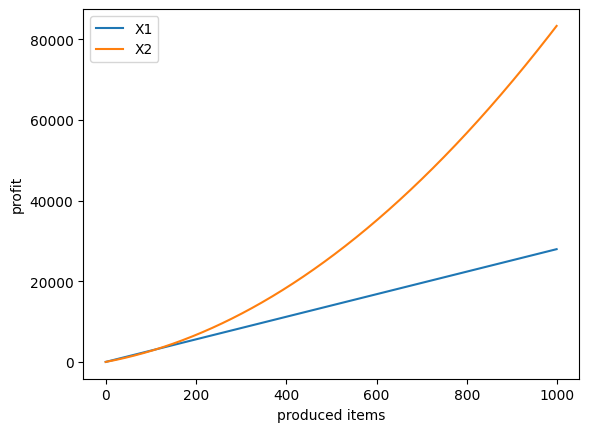

In [151]:
# -----------------------------------
# Import lib
# -----------------------------------
import matplotlib.pyplot as plt

# -----------------------------------
# Define range
# -----------------------------------
x_cords = range(0,1000)

# -----------------------------------
# functions
# -----------------------------------
X1 = [x * 28 for x in x_cords] 
X2 = [x * 21 + (0.25 * x)**2 for x in x_cords] 

# -----------------------------------
# Plotting
# -----------------------------------
plt.plot(x_cords,X1, label="X1")
plt.plot(x_cords,X2, label="X2")
plt.xlabel("produced items")
plt.ylabel("profit")
plt.legend(loc="upper left")
plt.show()

<b>3.4 Cplex solution</b><br>

<div style="text-align:center">
<img src="img/IBM_CPLEX_0.png">
</div>

Warning, in reality, I am using DocPlex here, who automatically picks quadratic.

In [152]:
# -----------------------------------
# Import lib
# -----------------------------------
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# -----------------------------------
# Type of problem
# -----------------------------------
model = Model(name='maximize_profit', log_output=True)

# -----------------------------------
# Decisions variables
# -----------------------------------
X1 = model.integer_var(name='X1')
X2 = model.integer_var(name='X2')

# -----------------------------------
# Math model
# -----------------------------------
# Objective
model.maximize(28 * X1  + (21 * X2 + 0.25 * X2 ** 2))

# Constraints
model.add_constraint(X1 + X2  <= 1000)
model.add_constraint(0.5 * X1 + 0.4 * X2  <= 500)
# model.add_constraint(X1   >= 100)
# -----------------------------------
# Solution
# -----------------------------------
model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 271000.000
status: OPTIMAL_SOLUTION(2)
  X2=1000


# <b> 4. Modeling of a non linear Quadratic Programming (QP)  production mixe optimization</b>


<div style="text-align:center">
<img src="img/the-lg-radio-factory-established-in-1962-notable-for-its-production-KKRM4R.jpg" width="600">
</div>

Let's try out this code found on the net, not 100% sure about it yet.

## Instance

A manufacturing company produces two products: Radios and Tv sets. Sales price relationship for these two products are given below:
 <table style="margin: 0px auto;">
  <tr>
    <th><b>Products</b></th>
    <th>Quantity demanded</th>
    <th>Unit price</th>
  </tr>
  <tr>
    <td>TV</td>
    <td>1500-5p1</td>
    <td>P1</td>
  </tr>
  <tr>
    <td>RADIO</td>
    <td>3800-10p2</td>
    <td>P2</td>
  </tr> 
</table> 

The total cost functions for these two products are given by 200x1 + 0.1x² and 300x2 + 0.1x² respectively. 

The production takes place on two assembly lines. 
Radio sets are assembled on Assebly line 1 and TV sets are assembled on Assembly line II. 

Because of the limitations of the assembly line capacities, the daily production is limited to no more than 80 radio sets and 60 TV sets. 

The production of both types of products require electronic components. The production of each of these sets requires five units and six units of electronic equipment components respectively. 

The electronic components are supplied by another manufacturer, and the supply is limited to 600 units per day. The company has 160 employees, the labor supply amounts to 160 man-days. The production of one unit of radio set requires 1 man-day of labor, whereas 2 man-days of labor are required for a TV set. How many units of radio and TV sets should the company produce in order to maximize the total profit. 

Formulate the problem as a non- linear Programming problem.

Link : https://www.youtube.com/watch?v=JRWfph5PD7E

# Math model

<b>Objective function pre-treatment :</b><br>
Let x1 and x2 be the tv and radio amount to produce.<br><br>

x1 = 1500 - 5p1<br>
x2 = 3800 - 10p2<br><br>

Thus, we can deduce p1 and p2:<br><br>

5p1 = 1500 - x1 => p1 = 1500/5 - x1/5 =>    <b>p1 = 300 - 0.2x1</b><br>
10p2 = 3800 - x2 => p2 = 3800/10 - x2/10 => <b>p2 = 380 - 0.1x2</b><br><br>

Let R = revenue = p1x1 + p2x2 <br>
Let C1 = cost 1 = 200x1 + 0.1x1²<br>
Let C2 = cost 2 = 300x2 + 0.1x2² <br>
Objective to maximize : R - C1 - C2

<b>Deduced math model :</b>

$$
Max (P) = (300 - 0.2x_{1})x_{1} + (380 - 0.1x_{2})x_{2} - 200x_{1} + 0.1x_{1}² - 300x_{2} + 0.1x_{2}²  
$$
$$
subject \thinspace to 
$$
$$
 
$$
$$
 x_{1}<=80
$$
$$
x_{2}<=60
$$
$$
5x_{1}+6x_{2}<=600
$$
$$
x_{1}+2x_{2}<=160
$$

## Cplex solution

<div style="text-align:center">
<img src="img/IBM_CPLEX_0.png">
</div>

Docplex automatically picks quadratic, but the solution looks weird to me, searching....

In [153]:
# -----------------------------------
# Import lib
# -----------------------------------
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# -----------------------------------
# Type of problem
# -----------------------------------
model = Model(name='maximize_profit', log_output=True)

# -----------------------------------
# Decisions variables
# -----------------------------------
X1 = model.integer_var(name='X1') #TV
X2 = model.integer_var(name='X2') #RADIO

# -----------------------------------
# Math model
# -----------------------------------
# Objective
R = (300 - 0.2 * X1) * X1 + (380 - 0.1 * X2 ) * X2 # revenue
C1 = 200 * X1  + 0.1 * X1 ** 2 # cost for producing X1
C2 = 300 * X2 + 0.1 * X1 ** 2 # cost for producing X2

# Objective function
model.maximize( R - C1 - C2) 

# Constraints
model.add_constraint(X1 <= 80) # Max tvs prod
model.add_constraint(X2 <= 60) # Max radios prod
model.add_constraint(5*X1 + 6*X2 <= 600) #Electronic components limit
model.add_constraint(X1 + 2*X2 <= 160) # Max worktime

# -----------------------------------
# Solution
# -----------------------------------
model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 8310.000
status: OPTIMAL_SOLUTION(2)
  X1=60
  X2=50


# <b> Modeling of a Markovitz Portfolio optimization</b>




<div style="text-align:center">
<img src="img/Efficient-Frontier.gif" width="600">
</div>

## Abstract

Given a combination of assets, I want to build the best portfolio, selecting an acceptable risk.

Risk of a portfolio is based on the variability of returns from said portfolio.
Selecting the best tradoff between risks and returns is my objective.

Markowitz introduced of the mean-variance (MV) as a measured risk

The efficient frontier is an investment portfolio which occupies the "efficient" parts of the risk–return spectrum.
The non-linearity comes from the fact that we use the standard deviation (variance) to quantify the risks, 
but it will be quadratic optimization .

Already, 2 intuitive models comes in mind ( Mosek ), but there are more: 

- Minimize the portfolio risk
- Maximize the expected portfolio return

MPT assumes that investors are risk averse, meaning that given two portfolios that offer the same expected return, investors will prefer the less risky one. Thus, an investor will take on increased risk only if compensated by higher expected returns. Conversely, an investor who wants higher expected returns must accept more risk

<b> A Very cool thing :</b> 
<b>Some experts apply MPT to portfolios of projects and other assets besides financial instruments...</b>


Best link : https://en.wikipedia.org/wiki/Markowitz_model

https://en.wikipedia.org/wiki/Efficient_frontier

## Difference between standard deviation and mean variance

https://www.investopedia.com/ask/answers/021215/what-difference-between-standard-deviation-and-variance.asp

- Standard deviation is the spread of a group of numbers from the mean.
- The variance measures the average degree to which each point differs from the mean.
- While standard deviation is the square root of the variance, variance is the average of the squared difference of each data point from the mean.








## Instance

 <table style="margin: 0px auto;">
  <tr>
    <td>Equally weighted Asset (25%)</td>
    <td>A</td>
    <td>B</td>
    <td>C</td>
    <td>D</td>
  </tr>
  <tr>
    <td>Expected return (%)</td>
    <td>4</td>
    <td>6</td>
    <td>10</td>
    <td>14</td>
</tr>
</table> 

## Portfolio Expected return

Expected Return of the Portfolio E(Rp) = Σ (Weight of each asset × Expected Return of each asset)

In [154]:
expected_return = (4 * 25) + (6 * 25) + (10 * 25) + (14 * 25)
print(expected_return / 100 ," %") 

8.5  %


## Portfolio Variance

https://blogboard.io/blog/knowledge/python-variance/

In [155]:
portfolio = [4,6,10,14]

# Using statistics
print(" Variance using statistics : ",statistics.pvariance(portfolio))

# Manually 
# Calculate mean
length = len(portfolio)
mean = sum(portfolio) / length

# Calculate variance
squared_diffs = [(x - mean) ** 2 for x in portfolio]
variance = sum(squared_diffs) / length

print(" Variance computed manually : ",variance)

 Variance using statistics :  14.75
 Variance computed manually :  14.75


## Portfolio Standard deviation

<div style="text-align:center">
<img src="img/formula.png" width="600">
</div>

Where:

- x1,x2,x3,.......,xN are the individual data points
- x‾x is the mean of the data
- N is the number of data points in the sample


In [156]:
# Using stats lib
import statistics
print("Standard Deviation using stats:", statistics.stdev(portfolio))

# Using numpy
import numpy as np
# Example dataset
np_data = np.array(portfolio)
# Calculate standard deviation
np_std_dev = np.std(portfolio, ddof=1)
print("Standard Deviation using numpy:", np_std_dev)




Standard Deviation using stats: 4.43471156521669
Standard Deviation using numpy: 4.43471156521669


## Math model

I'm searching for some clear models, then try to make the simpliest as possible sum of them ... Please wait.

https://docs.mosek.com/portfolio-cookbook/markowitz.html

https://en.wikipedia.org/wiki/Modern_portfolio_theory

https://research.ijcaonline.org/volume113/number7/pxc3901691.pdf

https://sites.math.washington.edu//~burke/crs/408/fin-proj/mark1.pdf

https://www.simtrade.fr/blog_simtrade/implementing-markowitz-asset-allocation-model/

## Instance

Same thing for the instance, I wanna build the simpliest example as possible, accroding to the simpliest
math model as possible.

Comin' soon


Crazy complete example ( Nothin to do)<br>
https://medium.com/@andrejin.nagano/portfolio-optimization-explained-python-code-d15cd017ff31<br>
https://www.askpython.com/python/examples/python-portfolio-optimization<br>

<br>
Crazy python library that does everything in one go : <br>
https://github.com/skfolio/skfolio<br>


## Solver solution

I will probably use CPLEX-DOCPLEX, as it's a quadratic problem.

In [157]:
# COmin soon

# <b> Minimize the rosenbrock function using Scipy</b>

Source :  https://gaurav-adarshi.medium.com/nonlinear-programming-optimization-df65f0576998

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

# Objective function
def rosenbrock(vars):
    x, y = vars
    a, b = 1, 100
    return (a - x)**2 + b * (y - x**2)**2

# Initial guess
initial_guess = [0, 0]

# Perform the optimization
result = minimize(rosenbrock, initial_guess)

# Extract results
x_opt, y_opt = result.x
optimal_value = rosenbrock(result.x)

# Print results
print(f"Optimal value of x: {x_opt}")
print(f"Optimal value of y: {y_opt}")
print(f"Minimum value of Rosenbrock function: {optimal_value}")

# Plotting
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

# 3D Surface Plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.scatter(x_opt, y_opt, optimal_value, color='red', s=50, label='Optimal Solution')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Objective Function Value')
ax.set_title('3D Surface plot of Rosenbrock Function')
ax.legend()

plt.show()

Optimal value of x: 0.9999946714964494
Optimal value of y: 0.9999893213499021
Minimum value of Rosenbrock function: 2.8439915001532524e-11


#  <b> Modeling of a non linear facility location model</b>

## Abstract
Comin soon
## Instance
Comin soon
## Math model
Comin soon
## Solver solution
Comin soon